In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.linear_model import LinearRegression

In [3]:
dfe = pd.read_csv('/Users/huwendi/Desktop/DS1/Homework/Mid term/knndata.csv', header = 0, index_col = None)
dfe.head(3)

,x1,x2,y
0,1,-10,0.970438
1,2,-10,1.142187
2,3,-10,1.286042


In [4]:
y_knn=[]
for i in range(dfe.shape[0]):
    dfe['dist'] = (dfe.x1[i] - dfe['x1'])**2+(dfe.x2[i] - dfe['x2'])**2#the fourth x,print(df.x[3])
    dfe_y=dfe.sort_values(by=['dist'])
    if dfe_y.dist[9]==dfe_y.dist[10]:
        
        ye_values_c = dfe_y.y[:10]
        avg_ye=sum(ye_values_c)/10
        y_knn.append(avg_ye)
    
        
    else:
        dfe_y = dfe_y.reset_index(drop=True)#give the table new index
        ye_values=dfe_y.y[:10][dfe_y.dist!=dfe_y.dist[9]]
        ye_values_append=dfe_y.y[dfe_y.dist==dfe_y.dist[9]]
        ye_values_c = pd.concat([ye_values, ye_values_append])
        avg_ye=np.mean(ye_values_c)
        y_knn.append(avg_ye)


In [5]:
se = (dfe.y - y_knn)**2
RMSE = (np.mean(se))**2
print(RMSE)

0.12061688659051709


In [6]:
dfe['knn']=y_knn
y_knn1 = dfe['knn'].values.reshape(-1, 1)
y = dfe["y"].values.reshape(-1, 1)
reg = LinearRegression().fit(y_knn1, y)
y_hat = reg.intercept_ + reg.coef_ * y

Text(0.5, 1.0, '0.12061688659051709')

Text(0.5, 0, 'y')

Text(0, 0.5, 'yhat')

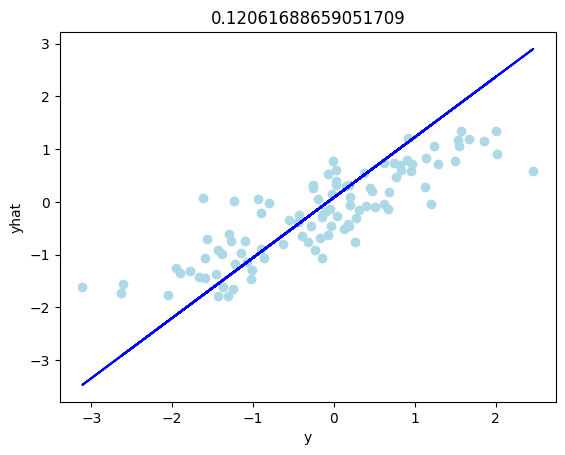

In [7]:
plt.plot(y,y_hat,color='b')
plt.scatter(dfe.y, y_knn,color="lightblue")
plt.title(RMSE)
plt.xlabel('y')
plt.ylabel('yhat')
plt.show()
